# Illustrate our Synthetic NMR Pattern Generator
We build patterns by gradually building up from single peaks, to single peaks, to intersecting groups peaks.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from nmrtrack import synthetic
import numpy as np

## Making a Single Peak
We use Lorentz functions to describe the shape of an NMR peak. The utilities with `nmrtrack` create a function which returns the predicted intensity of the peak as a function of offset. 

In [2]:
peak_fun = synthetic.generate_peak(center=0, area=1, width=0.01)

Text(0.5, 0, '$\\delta$')

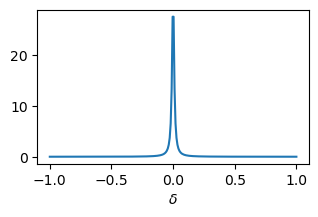

In [3]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-1, 1, 256)

ax.plot(x, peak_fun(x))
ax.set_xlabel('$\delta$')

## Making a Multiplets
NMR peaks split in a hierarchical patterns. Peaks split split into subpeaks which can again split.

Make a complex peak by listing the number of splits and distance between subpeaks at each level.

In [4]:
doublet = synthetic.generate_peak(-0.2, 1, 0.01, multiplicity=[2], coupling_offsets=[0.05])

In [5]:
quadruplet = synthetic.generate_peak(0, 1, 0.01, multiplicity=[4], coupling_offsets=[0.05])

In [6]:
triplet_of_doublets = synthetic.generate_peak(0.2, 1, 0.005, multiplicity=[3, 2], coupling_offsets=[0.05, 0.02])

Text(0.5, 0, '$\\delta$')

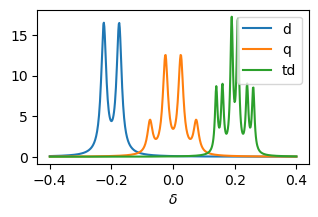

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-0.4, 0.4, 512)
ax.plot(x, doublet(x), label='d')
ax.plot(x, quadruplet(x), label='q')
ax.plot(x, triplet_of_doublets(x), label='td')

ax.legend()

ax.set_xlabel('$\delta$')

## Combining Peaks
Combine peaks by providing a list of individual peaks to the `combine_peaks` function.

In [8]:
pattern = synthetic.PeakFunction.combine([doublet, quadruplet, triplet_of_doublets])

Text(0.5, 0, '$\\delta$')

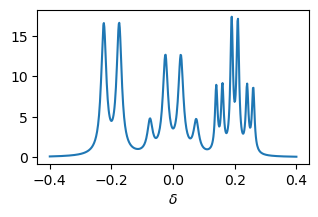

In [9]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

x = np.linspace(-0.4, 0.4, 512)
ax.plot(x, pattern(x), label='d')

ax.set_xlabel('$\delta$')

## Generating Random Patterns
We provide a "PatternGenerator" class which selects a random number of peaks of a certain type and generates a pattern over a specified interval.

Define the options for the pattern as part of the "PatternGenerator" class options then call `generate_patterns` to produce an endless stream of patterns along with the seed information about the peaks used to generate them.

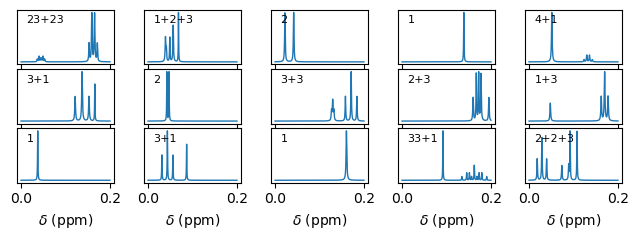

In [10]:
fig, axs = plt.subplots(3, 5, figsize=(6.5, 2.5), sharex=True, sharey=False)

generator = synthetic.PatternGenerator(offset_count=1024)
offsets = generator.offsets
for ax, (info, pattern) in zip(axs.flatten(), generator.generate_patterns()):
    name = '+'.join([x.peak_type for x in info])
    ax.text(0.1, 0.9, name, transform=ax.transAxes, fontsize=8, va='top')
    ax.plot(offsets, pattern, lw=1)
    ax.set_yticks([])

for ax in axs[-1, :]:
    ax.set_xlabel('$\delta$ (ppm)')

fig.tight_layout(h_pad=0)
fig.savefig('figures/random-nmr-patterns.png', dpi=320)

The generator returns an "info" object containing locations and heights of each peak within a pattern, and the subpeaks within the overall.

In [11]:
info

[PeakInformation(peak_type='2', center=0.1000686592070423, width=0.0005926987887306457, area=0.5717601237514613, subpeak_centers=[0.09222245913599861, 0.107914859278086], subpeak_areas=[0.2858800618757307, 0.2858800618757307]),
 PeakInformation(peak_type='2', center=0.0814076834190645, width=0.0007634852699764285, area=0.2210572508352385, subpeak_centers=[0.07366402640036296, 0.08915134043776604], subpeak_areas=[0.11052862541761925, 0.11052862541761925]),
 PeakInformation(peak_type='3', center=0.02888106017527465, width=0.0007334097288651192, area=0.6205474689513526, subpeak_centers=[0.018348546481505558, 0.02888106017527465, 0.03941357386904374], subpeak_areas=[0.15513686723783815, 0.3102737344756763, 0.15513686723783815])]